In [1]:
import psycopg2,datetime,heapq
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
#print("Opened database successfully")
cur = conn.cursor()
#conn.close()

In [2]:
conn.close()

In [6]:
# date
cur.execute("SELECT AVG(sdate - filing_date),MAX(sdate - filing_date),MIN(sdate - filing_date) FROM trademark")
r = cur.fetchall()
print("From filing to start")
print("AVG: " , float(r[0][0]))
print("MAX: " , r[0][1])
print("MIN: " , r[0][2])

From filing to start
AVG:  262.30004615672874
MAX:  5628
MIN:  44


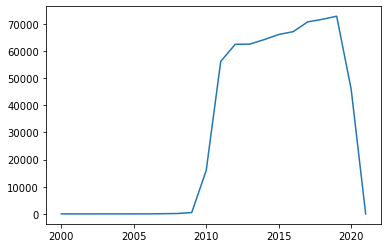

[6, 0, 1, 13, 11, 18, 23, 77, 153, 505, 16035, 56164, 62463, 62521, 64194, 66067, 67120, 70718, 71656, 72796, 45918, 0]


In [4]:
# 申請
cur.execute("SELECT filing_date FROM trademark")
r = cur.fetchall()
r = [i[0].year for i in r]
yearcnt = []
for i in range(22):
    yearcnt.append(0)
for i in r:
    yearcnt[i-2000] += 1

plt.plot(list(range(2000,2022)),yearcnt)
plt.xticks(range(2000,2022,5))
plt.show()
print(yearcnt)

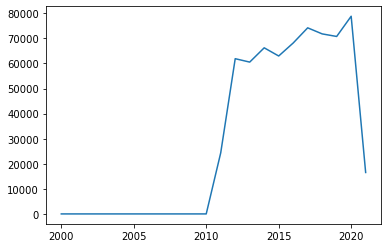

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24360, 61918, 60557, 66257, 62993, 68177, 74226, 71809, 70785, 78849, 16528]
656459


In [3]:
# 公告註冊
cur.execute("SELECT sdate FROM trademark")
r = cur.fetchall()
r = [i[0].year for i in r]
yearcnt = []
for i in range(22):
    yearcnt.append(0)
for i in r:
    yearcnt[i-2000] += 1

plt.plot(list(range(2000,2022)),yearcnt)
plt.xticks(range(2000,2022,5))
plt.show()
print(yearcnt)
print(sum(yearcnt))

In [7]:
# class
cur.execute("SELECT class FROM rcc")
r = cur.fetchall()
print("Total: ",len(r))

Total:  847367


[0, 11477, 3023, 50943, 4151, 50996, 8313, 17831, 6051, 66209, 14490, 17305, 14377, 494, 12258, 1372, 23766, 5405, 20297, 4109, 12948, 17618, 1874, 888, 8920, 39996, 3333, 2106, 17276, 30490, 55503, 11312, 15029, 8101, 2972, 99433, 12844, 11998, 10118, 8416, 5454, 38700, 27022, 49174, 14605, 7615]


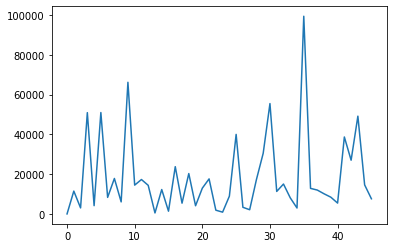

No class: 755


In [8]:
cnt = []
for i in range(46):
    cnt.append(0)
    
for i in r:
    if i[0] != None:
        c = i[0]
        cnt[c] += 1
print(cnt)
plt.plot(cnt)
plt.show()
print("No class:" , len(r) - sum(cnt))

In [5]:
# 產業名稱處理
"""
from io import StringIO
from io import open
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage

def process_pdf(rsrcmgr, device, fp, pagenos=None, maxpages=0, password='', caching=True, check_extractable=True):
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=check_extractable):
        interpreter.process_page(page)
    return

def Get_pdf_content():
    pdf = open("C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\Jack\\1_Course\\109-2\\IM Project\\文件\\產業目錄.pdf", "rb")
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    process_pdf(rsrcmgr, device, pdf)
    device.close()
    content = retstr.getvalue()
    retstr.close()
    lines = str(content).split("\n")
    return lines
l = Get_pdf_content()
classcontent = [""]
for j in range(1,46):
        for i in l:
            if "第  " + str(j) + "  類：" in i or "第  " + str(j) + " 類：" in i:
                classcontent.append(i)
                break
"""

'\nfrom io import StringIO\nfrom io import open\nfrom pdfminer.converter import TextConverter\nfrom pdfminer.layout import LAParams\nfrom pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter\nfrom pdfminer.pdfpage import PDFPage\n\ndef process_pdf(rsrcmgr, device, fp, pagenos=None, maxpages=0, password=\'\', caching=True, check_extractable=True):\n    interpreter = PDFPageInterpreter(rsrcmgr, device)\n    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=check_extractable):\n        interpreter.process_page(page)\n    return\n\ndef Get_pdf_content():\n    pdf = open("C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\Jack\\1_Course\\109-2\\IM Project\\文件\\產業目錄.pdf", "rb")\n    rsrcmgr = PDFResourceManager()\n    retstr = StringIO()\n    laparams = LAParams()\n    device = TextConverter(rsrcmgr, retstr, laparams=laparams)\n    process_pdf(rsrcmgr, device, pdf)\n    device.close()\n    content = retstr.getvalue(

In [9]:
classcontent = ['', '第  1  類：工業、科學、照相用，以及農業、園藝、林業用之化學品；未加工人造樹脂、未加工塑膠；', '第  2  類：漆、清漆、亮光漆；防銹劑及木材防腐劑；著色劑、染料；印刷、打印及雕版用油墨；未', '第  3  類：不含藥化粧品及盥洗用製劑；不含藥牙膏、牙粉；香料、香精油；洗衣用漂白劑及其他洗', '第  4  類：工業用油及油脂、蠟；潤滑劑；灰塵吸收劑、灰塵濕潤劑及灰塵黏著劑；燃料及照明用燃', '第  5  類：藥品、醫療用及獸醫用製劑；醫療用衛生製劑；醫療用或獸醫用食療食品、嬰兒食品；人', '第  6  類：普通金屬及其合金、礦砂；建築及結構工程用金屬材料；可移動金屬建築物；普通金屬製', '第  7  類：機器、工具機、電動工具；非陸上交通工具用馬達及引擎；非陸上交通工具用機器聯結器', '第  8  類：手動式手工用具及器具；刀叉匙餐具；非槍砲之隨身武器；剃刀。 ', '第  9  類：科學、研究、導航、測量、攝影、電影、視聽、光學、計重、計量、信號、檢測、測試、', '第  10  類：外科、內科、牙科與獸醫用之器具及儀器；義肢、義眼、假牙；矯形用品；傷口縫合材料；', '第  11  類：照明、加熱、冷卻、產生蒸氣、烹飪、乾燥、通風、給水及衛浴設備和裝置。 ', '第  12  類：交通工具；陸運、空運或水運用器械。 ', '第  13  類：火器；火藥及發射體；爆炸物；煙火。 ', '第  14  類：貴重金屬及其合金；首飾，寶石及半寶石；鐘錶和計時儀器。 ', '第  15  類：樂器；樂譜架及樂器支架；指揮棒。 ', '第  16  類：紙及紙板；印刷品；裝訂材料；照片；家具除外之文具及辦公用品；文具用或家庭用黏著', '第  17  類：未加工及半加工之橡膠、馬來樹膠、樹膠、石棉、雲母及該等材料之替代品；生產時使用', '第  18  類：皮革及人造皮革；動物皮及獸皮；行李袋及手提袋；傘及遮陽傘；手杖；鞭子、馬具；動', '第  19  類：非金屬製建築材料；建築用非金屬製硬管；柏油、瀝青；非金屬製可移動之建築物；非金', '第  20  類：家具、鏡子、畫框；貯藏或運輸用非金屬製容器；未加工或半加工之骨、角、鯨骨或珍珠', '第  21  類：家庭或廚房用具及容器；餐叉、餐刀及餐匙以外之烹飪用具及餐具；梳子及海綿；畫筆除', '第  22  類：繩索及細繩；網；帳蓬及塗焦油或蠟之防水篷布；紡織品或合成材料製之遮篷；帆；運輸', '第  23  類：紡織用紗及線。 ', '第  24  類：紡織品及紡織品替代品；家用亞麻布製品；紡織品製或塑膠製簾。 ', '第  25  類：衣著、靴鞋、頭部穿戴物。 ', '\x0c第  26 類：花邊、辮帶及刺繡品，以及裁縫用品飾帶及蝴蝶結；鈕扣、鉤扣、別針及針；人造花；髮', '第  27  類：地毯、小地毯、地墊及草蓆、亞麻油地氈及其他鋪地板用品；非紡織品製壁掛。 ', '第  28  類：競賽遊戲用品、玩具及遊戲器具；視頻遊戲器具；體操及運動用品；聖誕樹裝飾品。 ', '第  29  類：肉、魚肉、家禽肉及野味；濃縮肉汁；經保存處理、冷凍、乾製及烹調之水果及蔬菜；果', '第  30  類：咖啡、茶、可可及代用咖啡；米、義大利麵條及麵條；樹薯粉及西谷米；麵粉及穀', '第  31 類：未加工農業、水產養殖、園藝及林業產品；未加工穀物及種子；新鮮水果及蔬菜，新鮮香', '第  32  類：啤酒；不含酒精之飲料；礦泉水與汽水；水果飲料及果汁；製飲料用糖漿及其他製飲料用', '第  33  類：啤酒除外之含酒精飲料；製飲料用含酒精之調製品。 ', '第  34  類：菸草及菸草代用品；菸及雪茄；電子菸及吸菸用霧化器；菸具；火柴。 ', '第  35  類：廣告；企業管理，組織及經營；辦公事務。 ', '第  36  類：財務，金融及銀行服務；保險服務；不動產業務。 ', '第  37  類：建造服務；安裝及修繕服務；採礦，石油及天然氣鑽井。 ', '\x0c第  38  類：電信通訊服務。 ', '第  39  類：運輸；貨品包裝及倉儲；旅行安排。 ', '第  40  類：材料處理；廢棄物及垃圾再生處理；空氣淨化及水處理；印刷服務；食物和飲料保存處理。 ', '第  41  類：教育；提供訓練；娛樂；運動及文化活動。 ', '第  42  類：科學及技術性服務與研究及其相關之設計；工業分析，工業研究及工業設計服務；品質管', '第  43  類：提供食物及飲料之服務；臨時住宿。 ', '第  44  類：醫療服務；獸醫服務；為人類或動物之衛生及美容服務；農業、水產養殖、園藝及林業服', '第  45 類：法律服務；對有體財產和個人提供實體保護之安全服務；為配合個人需求由他人所提供之']

In [10]:
# Top 10 classes
index = list(map(cnt.index, heapq.nlargest(10, cnt)))
print(index)
for x in [classcontent[i] for i in index]:
    print(x)

[35, 9, 30, 5, 3, 43, 25, 41, 29, 42]
第  35  類：廣告；企業管理，組織及經營；辦公事務。 
第  9  類：科學、研究、導航、測量、攝影、電影、視聽、光學、計重、計量、信號、檢測、測試、
第  30  類：咖啡、茶、可可及代用咖啡；米、義大利麵條及麵條；樹薯粉及西谷米；麵粉及穀
第  5  類：藥品、醫療用及獸醫用製劑；醫療用衛生製劑；醫療用或獸醫用食療食品、嬰兒食品；人
第  3  類：不含藥化粧品及盥洗用製劑；不含藥牙膏、牙粉；香料、香精油；洗衣用漂白劑及其他洗
第  43  類：提供食物及飲料之服務；臨時住宿。 
第  25  類：衣著、靴鞋、頭部穿戴物。 
第  41  類：教育；提供訓練；娛樂；運動及文化活動。 
第  29  類：肉、魚肉、家禽肉及野味；濃縮肉汁；經保存處理、冷凍、乾製及烹調之水果及蔬菜；果
第  42  類：科學及技術性服務與研究及其相關之設計；工業分析，工業研究及工業設計服務；品質管


In [51]:
# 地址(前20)
add = {}
cur.execute("SELECT address FROM rco")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('臺北市', 135490), ('臺中市', 79161), ('新北市', 77167), ('高雄市', 45419), ('臺南市', 40017), ('中國大陸', 34740), ('日本', 34317), ('美國', 32524), ('桃園市', 19255), ('彰化縣', 19237), ('香港', 11187), ('南韓', 9904), ('桃園縣', 8767), ('南投縣', 7653), ('德國', 7537), ('雲林縣', 7313), ('屏東縣', 6750), ('新竹縣', 6397), ('法國', 6220), ('新竹市', 6185)]


In [22]:
# 類別
design = {}
cur.execute("SELECT Trademark_Design FROM trademark")
r = cur.fetchall()
for x in r:
    try:
        design[x[0]] = design[x[0]] + 1
    except:
        design[x[0]] = 1
designs = sorted(design.items(), key=lambda design: design[1],reverse=True)
print(sorted(design.items(), key=lambda design: design[1],reverse=True))

[('(墨色)(平面)', 532690), ('(彩色)(平面)', 123177), ('(彩色)(立體)', 351), ('(墨色)(立體)', 165), ('(墨色)(聲音)', 24), ('(墨色)(其他)', 17), ('(彩色)(顏色)', 15), ('(彩色)(其他)', 10), ('(彩色)(動態)', 8), ('(彩色)(全像圖)', 2)]


In [53]:
# Mark type
typ = [0,0,0,0]
cur.execute("SELECT Mark_type FROM trademark")
r = cur.fetchall()
for x in r:
    typ[x[0]] += 1
print(typ)

[655589, 116, 319, 435]


In [54]:
# Wav
cur.execute("SELECT caseno,Wavpath FROM trademark WHERE Wavpath is not null")
r = cur.fetchall()
print(r)

[(100037345, 'sounds/wav_100037345_20130830.wav'), (102061979, 'sounds/wav_102061979_20140801.wav'), (101041745, 'sounds/video_101041745_20120803.avi'), (102022784, 'sounds/video_102022784_20130507.avi'), (102032472, 'sounds/video_102032472_20140422.mpg'), (102032474, 'sounds/video_102032474_20140422.mpg'), (102051719, 'Sounds/102051719.wav'), (103003135, 'sounds/wav_103003135_20140918.wav'), (102022780, 'sounds/wav_102022780_20130506.wav'), (101032488, 'sounds/wav_101032488_20150702.wav'), (103028309, 'sounds/video_103028309_20140526.avi'), (100047374, 'sounds/wav_100047374_20140609.wav'), (103053150, 'sounds/wav_103053150_20140915.wav'), (103055523, 'sounds/wav_103055523_20140925.wav'), (104034398, 'sounds/wav_104034398_20150616.wav'), (104034397, 'sounds/wav_104034397_20150616.wav'), (104023315, 'sounds/video_104023315_20150507.mpg'), (103057800, 'sounds/wav_103057800_20160816.wav'), (103073675, 'sounds/wav_103073675_20161124.wav'), (103073667, 'sounds/wav_103073667_20161124.wav'), 

In [55]:
# 商標擁有權人(前20)(Agency)
add = {}
cur.execute("SELECT BChinese FROM rca")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('林景郁', 44739), ('閻啓泰', 38983), ('高玉駿', 36146), ('楊祺雄', 36063), ('陳長文', 26927), ('林志剛', 15225), ('丁靜玟', 8495), ('李世章', 8162), ('惲軼群', 7645), ('謝君玄', 7597), ('沈慶慧', 7052), ('林雪美', 7052), ('林志雄', 6922), ('陳順法', 6801), ('王鈞平', 6026), ('蔡坤財', 5945), ('李文傑', 5870), ('李博涵', 5845), ('閻啟泰', 5826), ('謝福順', 5608)]


In [11]:
# 商標擁有權公司(前20)
add = {}
cur.execute("SELECT AChinese FROM rco")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
company = sorted(add.items(), key=lambda add: add[1],reverse=True)[:20]
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('統一企業股份有限公司', 3570), ('統一超商股份有限公司', 782), ('王品餐飲股份有限公司', 772), ('統正開發股份有限公司', 598), ('日商資生堂股份有限公司', 596), ('中華電信股份有限公司', 518), ('開曼群島商騰訊控股有限公司', 495), ('棨泰健康科技股份有限公司', 494), ('法商拉奧里露公司', 485), ('特力股份有限公司', 477), ('美商蘋果公司', 476), ('東方美企業股份有限公司', 466), ('金車股份有限公司', 462), ('瓦城泰統股份有限公司', 426), ('佳格食品股份有限公司', 423), ('瑞士商．諾華公司', 408), ('臺中市政府', 403), ('美商壯生和壯生股份有限公司', 395), ('臺灣菸酒股份有限公司', 368), ('日商日產自動車股份有限公司', 364)]


In [57]:
# censor(前20)
add = {}
cur.execute("SELECT censor FROM trademark")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('鄭淑芬', 21681), ('郭珮萱', 17760), ('黃妙娟', 16316), ('趙立珍', 15696), ('江小燕', 14629), ('胡錦蓉', 14419), ('王秋梅', 14394), ('倪麗萍', 14130), ('朱彩雲', 14099), ('方長玲', 14014), ('陳嬿棻', 13985), ('吳健政', 13903), ('袁月美', 13826), ('陳愛玉', 13658), ('鄭春萍', 13447), ('王彩鳳', 12399), ('鍾桂華', 12368), ('洪文彬', 12001), ('洪梅玲', 11982), ('吳秋敏', 11791)]


In [58]:
# ServiceMark
typ = [0,0]
cur.execute("SELECT ServiceMark FROM trademark")
r = cur.fetchall()
for x in r:
    typ[x[0]] += 1
print(typ)

[656459, 0]


In [59]:
#RCP 不同 ==
cur.execute("SELECT caseno FROM rcp WHERE filename != displayname OR filename != path or path != displayname")
r = cur.fetchall()
print(r)

[(97043135,), (97043139,), (99042770,), (99055247,), (99058815,), (99045264,), (99060282,), (99058665,), (99040791,), (99047608,), (100005289,), (99050345,), (97047053,), (99048832,), (99052259,), (99005420,), (99044955,), (99007251,), (99064155,), (99064063,), (99045453,), (100006982,), (99053935,), (99047005,), (100015868,), (99051513,), (99052138,), (100025214,), (99064535,), (100032363,), (100032365,), (97050151,), (100027557,), (99063183,), (100055789,), (100038661,), (100007134,), (99059960,), (100042259,), (100031969,), (95051529,), (101008915,), (101013901,), (101007222,), (101007220,), (101017917,), (101045892,), (100052805,), (101037684,), (101039697,), (101021555,), (101034939,), (101034940,), (101026955,), (101053319,), (101054443,), (101039227,), (101039228,), (102066557,), (102051719,), (105021486,), (105021880,), (105046217,), (105059337,), (105057419,), (107019138,), (107022567,), (107072916,), (107076469,), (107077308,), (108029453,), (108029613,), (109011166,), (10900

In [164]:
"""
= CaseNo =
= RegisterNo =
= Trademark_Name =
= Trademark_Design =
= Filing_Date =
= Censor =
= Priority_Date =
= SDate =
= EDate =
= Word_Description =
= Mark_Type =
= Memo =
= Wavpath =
= ServiceMark =
= RegContentAgent =
	== BChinese ==
= RegContentClassification =
	== Enforcement_Rules ==
	== Class ==
	== Goods_Denomination ==
= RegContentOwner =
	== AChinese ==
	== AEnglish ==
	== Address ==
= RegContentPicture =
	== FileName ==
	== DisplayName ==
	== Path ==
"""

'\n= CaseNo =\n= RegisterNo =\n= Trademark_Name =\n= Trademark_Design =\n= Filing_Date =\n= Censor =\n= Priority_Date =\n= SDate =\n= EDate =\n= Word_Description =\n= Mark_Type =\n= Memo =\n= Wavpath =\n= ServiceMark =\n= RegContentAgent =\n\t== BChinese ==\n= RegContentClassification =\n\t== Enforcement_Rules ==\n\t== Class ==\n\t== Goods_Denomination ==\n= RegContentOwner =\n\t== AChinese ==\n\t== AEnglish ==\n\t== Address ==\n= RegContentPicture =\n\t== FileName ==\n\t== DisplayName ==\n\t== Path ==\n'

In [2]:
def getall(ID):
    cur.execute("SELECT * FROM rca WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rca:")
    print(r)
    print("==========")

    cur.execute("SELECT * FROM rcc WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rcc:")
    print(r)
    print("==========")


    cur.execute("SELECT * FROM rco WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rco:")
    print(r)
    print("==========")


    cur.execute("SELECT * FROM rcp WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rcp:")
    print(r)
    print("==========")


    cur.execute("SELECT * FROM trademark WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From trademark:")
    print(r)
    print("==========")


In [3]:
%%time
getall("099059518")

From rca:
[]
From rcc:
[(99059518, '商標法施行細則第13條第025類', 25, '衣服、襪鞋、帽子。'), (99059518, '商標法施行細則第13條第028類', 28, '玩偶、不與電視連用之電子遊戲機、不與外接顯示屏幕或顯示器連用之電子遊戲機、掌上型電子遊樂機、掌上型電子遊戲機、自動及投幣啟動之電子遊戲機、棋盤遊戲器具、紙牌遊戲器具。'), (99059518, '商標法施行細則第13條第041類', 41, '醫療及保健之教導及教育服務、知識或技術之傳授，舉辦各種講座。')]
From rco:
[(99059518, '財團法人惟生醫學文教基金會', 'HWAY HSEN MEDICAL FOUNDATION', '臺北市')]
From rcp:
[(99059518, 'imagesdata/egimg_099059518_1_038017.jpg', 'imagesdata/egimg_099059518_1_038017.jpg', 'imagesdata/egimg_099059518_1_038017.jpg')]
From trademark:
[('TrademarkRegXMLB_038017', 99059518, 1472423, '元氣寶寶 Vita 的安安圖', '(彩色)(平面)', datetime.date(2010, 11, 30), '呂美滿', None, datetime.date(2011, 9, 1), datetime.date(2021, 8, 31), None, 0, None, None, False)]
Wall time: 8.29 s


In [5]:
def showimage(ID):
    conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
    cur = conn.cursor()
    
    Path = ""
    cur.execute("SELECT doc FROM trademark WHERE caseno = %s"%ID)
    doc = cur.fetchall()
    Path += doc[0][0] + "/"
    
    cur.execute("SELECT Filename FROM rcp WHERE caseno = %s"%ID)
    name = cur.fetchall()
    Path += name[0][0]
    file = name[0][0]
    
    conn.close()
    
    os.chdir('/service/trademark/raw_data/XMLB/')
    BigPath = '/service/trademark/raw_data/XMLB/' + Path
    img = mpimg.imread(Path)
    imgplot = plt.imshow(img)
    plt.show()

    return file,BigPath
    

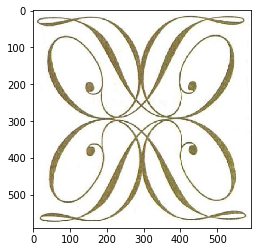

('imagesdata/egimg_104029742_1_042024.jpg',
 '/service/trademark/raw_data/XMLB/TrademarkRegXMLB_042024/imagesdata/egimg_104029742_1_042024.jpg')

In [29]:
showimage("104029742")

In [23]:
print("前十大產業：")
print(index)
print("前十多公司：")
print(company)
print("Designs")
print(designs)

前十大產業：
[35, 9, 30, 5, 3, 43, 25, 41, 29, 42]
前十多公司：
[('統一企業股份有限公司', 3570), ('統一超商股份有限公司', 782), ('王品餐飲股份有限公司', 772), ('統正開發股份有限公司', 598), ('日商資生堂股份有限公司', 596), ('中華電信股份有限公司', 518), ('開曼群島商騰訊控股有限公司', 495), ('棨泰健康科技股份有限公司', 494), ('法商拉奧里露公司', 485), ('特力股份有限公司', 477), ('美商蘋果公司', 476), ('東方美企業股份有限公司', 466), ('金車股份有限公司', 462), ('瓦城泰統股份有限公司', 426), ('佳格食品股份有限公司', 423), ('瑞士商．諾華公司', 408), ('臺中市政府', 403), ('美商壯生和壯生股份有限公司', 395), ('臺灣菸酒股份有限公司', 368), ('日商日產自動車股份有限公司', 364)]
Designs
[('(墨色)(平面)', 532690), ('(彩色)(平面)', 123177), ('(彩色)(立體)', 351), ('(墨色)(立體)', 165), ('(墨色)(聲音)', 24), ('(墨色)(其他)', 17), ('(彩色)(顏色)', 15), ('(彩色)(其他)', 10), ('(彩色)(動態)', 8), ('(彩色)(全像圖)', 2)]


In [6]:
def printclassimg(i,num):
    print(classcontent[i])
    cur.execute("SELECT caseno FROM rcc WHERE class = %d"%i)
    l = cur.fetchall()
    result = []
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        file = showimage(str(caseno))
        result.append((caseno,file))
    return result

In [7]:
def printcompanyimg(com,num):
    cur.execute("SELECT caseno FROM rco WHERE AChinese = '%s'"%com)
    l = cur.fetchall()
    result = []
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        file = showimage(str(caseno))
        result.append((caseno,file))
    return result

In [8]:
def printdesignimg(des,num):
    cur.execute("SELECT caseno FROM trademark WHERE Trademark_Design = '%s'"%des)
    l = cur.fetchall()
    result = []
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        file = showimage(str(caseno))
        result.append((caseno,file))
    return result

In [9]:
#printclassimg(35,10)
#printcompanyimg("開曼群島商騰訊控股有限公司",2)
printdesignimg("(彩色)(全像圖)",5)

Caseno:  103032080


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: '/service/trademark/raw_data/XMLB/'

In [80]:
from shutil import copy
from jinja2 import Environment, FileSystemLoader 
import os
os.chdir('/home/jack')

In [87]:
def generate_html(body,resultname):
    os.chdir('/home/jack')
    env = Environment(loader=FileSystemLoader('./'))
    template = env.get_template('template.html')     
    with open("%s.html"%resultname,'w+') as fout:   
        html_content = template.render(body=body)
        fout.write(html_content)

def writehtml(index,company,classcontent):
    body = []
    result = {}
    for a,b in enumerate(index):
        
        r = getclassimg(b,10) 
        content = ""
        
        for y in r:
            caseno = y[0] 
            filename = y[1][0]
            Path = y[1][1]

            
            content += '<br>Caseno : ' + str(caseno) + '\n\t'
            content += '<img src="%s" width="300">'%filename
            content += '\n\t'
                
            copy(Path,'/home/jack/imagesdata/') 
        result['target%s'%str(a+1)] = str(b)+" : "+classcontent[b]
        result['text%s'%str(a+1)] = content
        
    #print(result)
    body.append(result)
    generate_html(body,"Class") 
    
    
    body = []
    result = {}
    for a,b in enumerate(company):
        b = b[0]
        
        r = getcompanyimg(b,10) 
        content = ""
        
        for y in r:
            caseno = y[0] 
            filename = y[1][0]
            Path = y[1][1]

            
            content += '<br>Caseno : ' + str(caseno) + '\n\t'
            content += '<img src="%s" width="300">'%filename
            content += '\n\t'
                
            copy(Path,'/home/jack/imagesdata/') 
        result['target%s'%str(a+1)] = "公司 : " + str(b)
        result['text%s'%str(a+1)] = content
        
    #print(result)
    body.append(result)
    generate_html(body,"Company") 
        
writehtml(index,company,classcontent)

第  35  類：廣告；企業管理，組織及經營；辦公事務。 
Caseno:  100052909
Caseno:  104054073
Caseno:  107038450
Caseno:  107030229
Caseno:  104027578
Caseno:  105010155
Caseno:  104045027
Caseno:  108020532
Caseno:  103033787
Caseno:  105012404
第  9  類：科學、研究、導航、測量、攝影、電影、視聽、光學、計重、計量、信號、檢測、測試、
Caseno:  105052961
Caseno:  104017340
Caseno:  103074195
Caseno:  101006140
Caseno:  100045944
Caseno:  100056907
Caseno:  101067441
Caseno:  108016565
Caseno:  102004897
Caseno:  100880195
第  30  類：咖啡、茶、可可及代用咖啡；米、義大利麵條及麵條；樹薯粉及西谷米；麵粉及穀
Caseno:  103014691
Caseno:  105050719
Caseno:  108062487
Caseno:  101047708
Caseno:  103018838
Caseno:  104038604
Caseno:  107019898
Caseno:  100041387
Caseno:  108017089
Caseno:  107012357
第  5  類：藥品、醫療用及獸醫用製劑；醫療用衛生製劑；醫療用或獸醫用食療食品、嬰兒食品；人
Caseno:  100065061
Caseno:  101022086
Caseno:  101009342
Caseno:  108031559
Caseno:  102008623
Caseno:  107014357
Caseno:  100026216
Caseno:  100064593
Caseno:  106039164
Caseno:  107042982
第  3  類：不含藥化粧品及盥洗用製劑；不含藥牙膏、牙粉；香料、香精油；洗衣用漂白劑及其他洗
Caseno:  100058671
C

In [86]:
def getimagepath(ID):
    conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
    cur = conn.cursor()
    
    Path = ""
    cur.execute("SELECT doc FROM trademark WHERE caseno = %s"%ID)
    doc = cur.fetchall()
    Path += doc[0][0] + "/"
    
    cur.execute("SELECT Filename FROM rcp WHERE caseno = %s"%ID)
    name = cur.fetchall()
    Path += name[0][0]
    file = name[0][0]
    
    conn.close()
    
    os.chdir('/service/trademark/raw_data/XMLB/')
    BigPath = '/service/trademark/raw_data/XMLB/' + Path

    return (file,BigPath)

In [85]:
def getclassimg(i,num):
    print(classcontent[i])
    cur.execute("SELECT caseno FROM rcc WHERE class = %d"%i)
    l = cur.fetchall()
    result = []
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        file = getimagepath(str(caseno))
        result.append((caseno,file))
    return result

In [88]:
def getcompanyimg(com,num):
    print(com)
    cur.execute("SELECT caseno FROM rco WHERE AChinese = '%s'"%com)
    l = cur.fetchall()
    result = []
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        file = getimagepath(str(caseno))
        result.append((caseno,file))
    return result